预测shape: (10445, 96), 真实shape: (10445, 96)


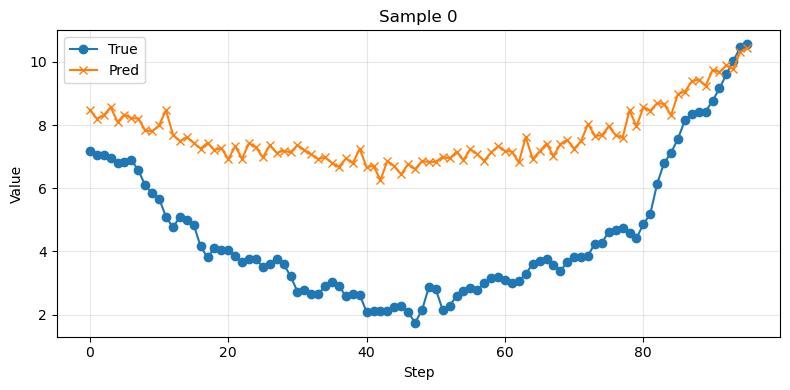

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 配置
model_name = 'PatchTST'
dataset_name = 'weather'

output_dir = f'../outputs/{model_name}/{dataset_name}'
preds_path = os.path.join(output_dir, f'preds_{dataset_name}_inv.npy')
trues_path = os.path.join(output_dir, f'trues_{dataset_name}_inv.npy')

preds = np.load(preds_path)
trues = np.load(trues_path)
print(f'预测shape: {preds.shape}, 真实shape: {trues.shape}')

# 可视化参数
sample_idx = 0   # 要画的样本索引，可改为任意int或list，如[0, 10, 100]
step_range = None  # 步长范围，如(0, 24)只画前24步，None为全部


def plot_pred_vs_true(preds, trues, sample_idx=0, step_range=None):
    if isinstance(sample_idx, int):
        sample_idx = [sample_idx]
    for idx in sample_idx:
        y_pred = preds[idx]
        y_true = trues[idx]
        if step_range is not None:
            s, e = step_range
            y_pred = y_pred[s:e]
            y_true = y_true[s:e]
            steps = np.arange(s, e)
        else:
            steps = np.arange(len(y_pred))
        plt.figure(figsize=(8, 4))
        plt.plot(steps, y_true, label='True', marker='o')
        plt.plot(steps, y_pred, label='Pred', marker='x')
        plt.title(f'Sample {idx}')
        plt.xlabel('Step')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


plot_pred_vs_true(preds, trues, sample_idx=sample_idx, step_range=step_range)